
# Analyzing Historical Stock and Revenue Data: Tesla vs GameStop

  
---

This notebook analyzes and compares the stock performance and revenue data of **Tesla (TSLA)** and **GameStop (GME)**.  
Data is extracted using `yfinance` for stock prices and web scraping for revenue data.  
Finally, interactive visualizations are created to compare both companies.




## Extracting Tesla Stock Data  

We use the **`yfinance`** library to extract Tesla stock data.  
The dataframe is reset and the first five rows are displayed to confirm correct extraction.


In [ ]:

import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# ----------------------------
# Tesla Stock Data
# ----------------------------
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

print("✅ Tesla Stock Data:")
print(tesla_data.head())



✅ Tesla Stock Data:
                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  



## Extracting Tesla Revenue Data  

We use **web scraping** to extract Tesla’s historical revenue data.  
The last five rows are displayed to confirm successful extraction.


In [ ]:
# -------------------------------------
# Tesla Revenue Data (HTML)
# -------------------------------------
url_tesla_html = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

html_data = requests.get(url_tesla_html).text
soup = BeautifulSoup(html_data, "html.parser")

tables = soup.find_all("table")
tesla_revenue = pd.read_html(str(tables[1]))[0]

# Clean up
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(r"\$|,", "", regex=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(float)

print("✅ Tesla Revenue Data:")
print(tesla_revenue.head())

✅ Tesla Revenue Data:
         Date  Revenue
0  2022-09-30  21454.0
1  2022-06-30  16934.0
2  2022-03-31  18756.0
3  2021-12-31  17719.0
4  2021-09-30  13757.0


/tmp/ipython-input-3715474789.py:10: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(tables[1]))[0]



## Extracting GameStop Stock Data  

Using **`yfinance`**, we extract stock data for GameStop (GME).  
The dataframe is reset and the first five rows are shown.


In [ ]:
# ------------------------------
# GameStop Stock Data
# ------------------------------
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)

print("✅ GameStop Stock Data:")
print(gme_data.head())

✅ GameStop Stock Data:
                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  



## Extracting GameStop Revenue Data  

We scrape GameStop’s revenue data from the web.  
The last five rows are displayed to verify correctness.



# Conclusion  

- **Tesla (TSLA):** Stock data extends back to 2012 and shows strong growth alongside increasing revenues.  
- **GameStop (GME):** Stock data extends back to 2006 and displays volatility, with notable spikes unrelated to revenue trends.  
- The comparison highlights how stock prices may move independently of company revenues, especially in cases like GameStop.

--- 


In [ ]:
# ---------------------------------------
# GameStop Revenue Data (HTML)
# ---------------------------------------
url_gme_html = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

html_data = requests.get(url_gme_html).text
soup = BeautifulSoup(html_data, "html.parser")

tables = soup.find_all("table")
gme_revenue = pd.read_html(str(tables[1]))[0]

# Clean up
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(r"\$|,", "", regex=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]
gme_revenue["Revenue"] = gme_revenue["Revenue"].astype(float)

print("✅ GameStop Revenue Data:")
print(gme_revenue.head())

✅ GameStop Revenue Data:
         Date  Revenue
0  2020-04-30   1021.0
1  2020-01-31   2194.0
2  2019-10-31   1439.0
3  2019-07-31   1286.0
4  2019-04-30   1548.0


/tmp/ipython-input-1477223702.py:10: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(tables[1]))[0]



## Tesla Stock Graph  

We visualize Tesla’s stock price history using the custom `make_graph` function.  
The graph includes a range slider for better interactivity.



## GameStop Stock Graph  

We use the same visualization function to plot GameStop’s stock price data.  
This allows us to compare its performance with Tesla over time.


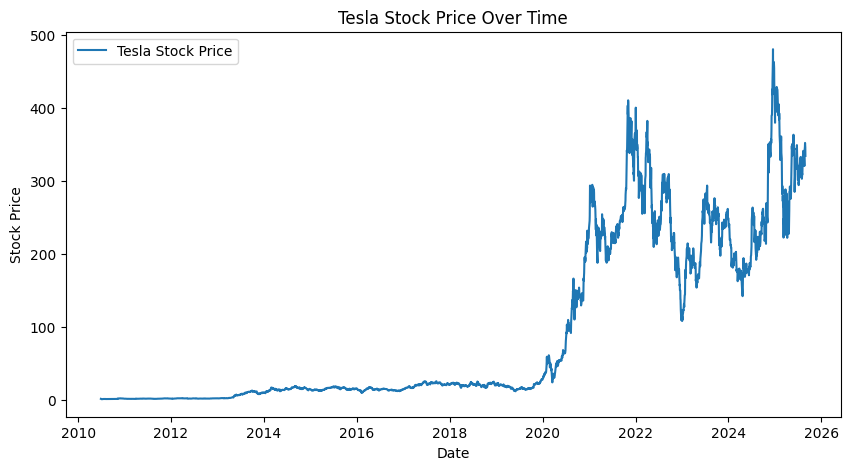

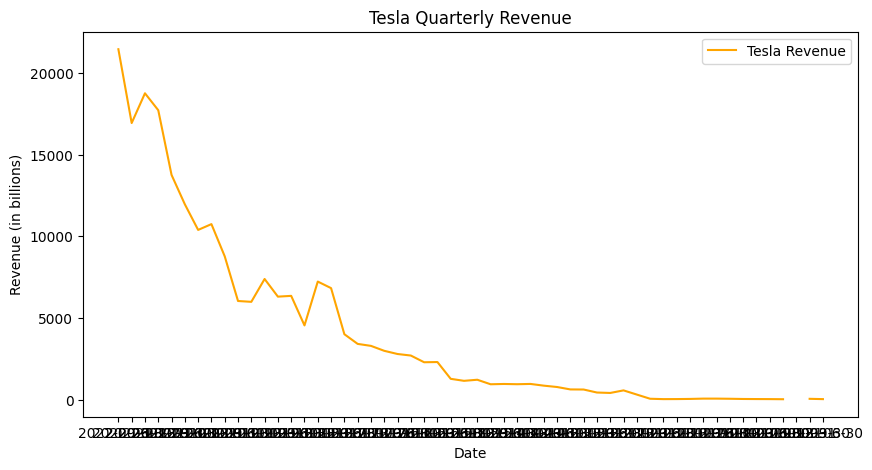

In [ ]:
# -----------------------------
# Tesla Dashboard
# -----------------------------
plt.figure(figsize=(10,5))
plt.plot(tesla_data["Date"], tesla_data["Close"], label="Tesla Stock Price")
plt.title("Tesla Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(tesla_revenue["Date"], tesla_revenue["Revenue"], label="Tesla Revenue", color="orange")
plt.title("Tesla Quarterly Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue (in billions)")
plt.legend()
plt.show()

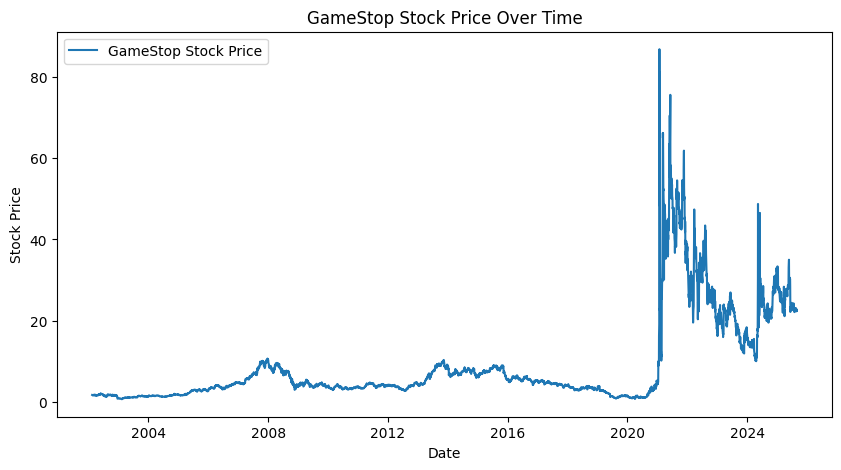

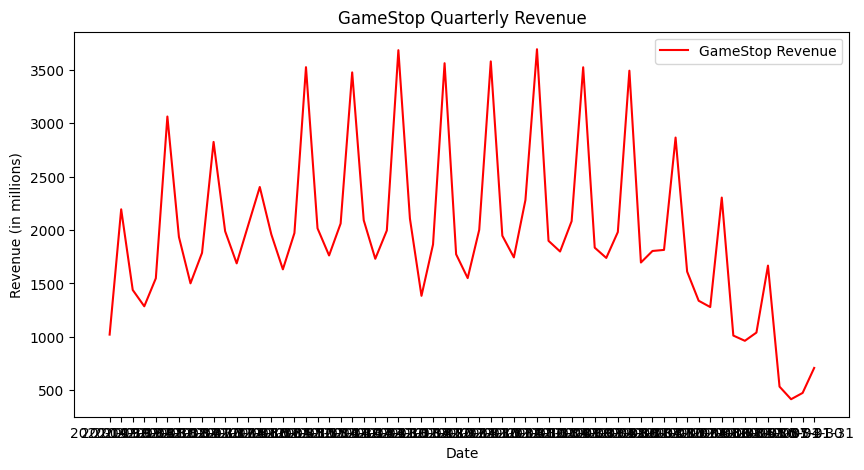

In [ ]:
# -----------------------------
#  GameStop Dashboard
# -----------------------------
plt.figure(figsize=(10,5))
plt.plot(gme_data["Date"], gme_data["Close"], label="GameStop Stock Price")
plt.title("GameStop Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(gme_revenue["Date"], gme_revenue["Revenue"], label="GameStop Revenue", color="red")
plt.title("GameStop Quarterly Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue (in millions)")
plt.legend()
plt.show()
